# Hyperparameter
## General Parameters
디폴트를 바꾸는 일이 거의 없다.

##### - booster[default : gbtree]
- gbtree  : tree based model / gblinear : linear model

##### - silent[default : 0]
- : 출력 메시지를 나타내고 싶지 않음

##### - nthread[default : 전체]


## Booster Parameters
트리 최적화, boosting, regularization 등
##### - eta[default 파이썬 wrapper : 0.3 / sklearn wrapper : 0.1]
- learning rate

##### - num_boost
- n_estimators 와 같은 파라미터
- weak learner의 개수

##### - min_child_weight[default : 1]
- GBM의 min_child_leaf와 유사. 과적합을 조절

##### - gamma [default : 0]
- 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
- 감마보다 큰 손실이 감소된 경우에 리프 노드를 분리.
- 값이 클수록 과적합 감소 효과

##### - max_depth[default : 6]
- 트리의 깊이에 제한.
- 너무 커지면, 특정 피처 조건에 특화
- 보통 3~10

##### - sub_sample[default : 1]
- GBM의 subsample과 동일
- 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율.

##### - colsample_bytree[default : -1]
- 트리 생성에 필요한 피처를 임의로 샘플링하는 데 사용

##### - lambda[default : 1] (reg_lambda)
- L2 Regularization
- 피처 개수가 많을 경우 적용을 검토하며, 값이 클수록 과적합 감소 효과

##### - alpha[default : 0] (reg_alpha)
- L1 Regularization
- 피처 개수가 많을 경우 적용을 검토하며, 값이 클수록 과적합 감소 효과

##### - scale_pos_weight [default : 1]
- 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한파라미터

## Learning Task Parameters
학습 시의 객체 함수, 평가지표 등

##### - objective
최솟값을 가져야할 손실 함수를 정의

- binary:logistic : 이진 분류
- multi:softmax : 다중 분류.-> num_class(레이블 클래스) 지정해야 함
- multi:softprob : 다중분류. 개별 레이블 클래스의 예측확률 분환
##### - eval_metric
검증에 사용되는 함수 정의.
회귀 -> rmse / 분류 -> error

- rmse, mae, logloss, error, merror,mlogloss, auc

## overfitting 해결
- eta를 낮춤
- max_depth를 낮춤
- min_child_weight값을 높임
- gamma를 높임
- subsample, colsample_bytree 조정

## early stopping
- 예측 오류가 더이상 개선되지 않으면 반복을 끝까지 수행하지 않고, 중지해 수행 시간을 개선
- n_estimators = 200, early stopping = 50이면,
- 다음 50번을 반복하는동안, 개선이 없으면 stop

# cancer ex
classification malignant(0) or benign(1)

In [1]:
import xgboost as xgb
print(xgb.__version__)

0.82


In [2]:
from xgboost import plot_importance #visualize features importnace
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [3]:
cancer = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer['target'] = y_label
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#malignant : 0 / benign : 1
print(dataset.target_names)
print(cancer.target.value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


## cv

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)
print('X_train shape : ',X_train.shape, 'X_test shape : ',X_test.shape)

X_train shape :  (455, 30) X_test shape :  (114, 30)


In [9]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
print(type(dtrain))

<class 'xgboost.core.DMatrix'>


In [8]:
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss', #early_stopping을 하려면, 반드시 있어야 함
    'early_stoppings' : 100
}

num_rounds = 400 # the number of boosting repetition

In [11]:
wlist = [(dtrain ,'train'), (dtest, 'eval')]

xgb_model = xgb.train(params=params, dtrain = dtrain, num_boost_round=num_rounds, evals = wlist)
#evals : early_stopping을 하려면, 반드시 있어야 함

[0]	train-logloss:0.609688	eval-logloss:0.61352
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logloss:0.133985	eval-logloss:0.181818
[18]	train-logloss:0.125599	eval-logloss:0.174729
[19]	train-logloss:0.117286	eval-logloss:0.167657
[20]	train-logl

[164]	train-logloss:0.0072	eval-logloss:0.087777
[165]	train-logloss:0.00718	eval-logloss:0.087517
[166]	train-logloss:0.007161	eval-logloss:0.087542
[167]	train-logloss:0.007142	eval-logloss:0.087642
[168]	train-logloss:0.007122	eval-logloss:0.08739
[169]	train-logloss:0.007103	eval-logloss:0.087377
[170]	train-logloss:0.007084	eval-logloss:0.087298
[171]	train-logloss:0.007065	eval-logloss:0.087368
[172]	train-logloss:0.007047	eval-logloss:0.087395
[173]	train-logloss:0.007028	eval-logloss:0.087385
[174]	train-logloss:0.007009	eval-logloss:0.087132
[175]	train-logloss:0.006991	eval-logloss:0.087159
[176]	train-logloss:0.006973	eval-logloss:0.086955
[177]	train-logloss:0.006955	eval-logloss:0.087053
[178]	train-logloss:0.006937	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.086973
[180]	train-logloss:0.006901	eval-logloss:0.087038
[181]	train-logloss:0.006884	eval-logloss:0.086799
[182]	train-logloss:0.006866	eval-logloss:0.086826
[183]	train-logloss:0.006849	eval-log

[326]	train-logloss:0.005354	eval-logloss:0.08578
[327]	train-logloss:0.005348	eval-logloss:0.085857
[328]	train-logloss:0.005342	eval-logloss:0.085939
[329]	train-logloss:0.005336	eval-logloss:0.085825
[330]	train-logloss:0.00533	eval-logloss:0.085869
[331]	train-logloss:0.005324	eval-logloss:0.085893
[332]	train-logloss:0.005318	eval-logloss:0.085922
[333]	train-logloss:0.005312	eval-logloss:0.085842
[334]	train-logloss:0.005306	eval-logloss:0.085735
[335]	train-logloss:0.0053	eval-logloss:0.085816
[336]	train-logloss:0.005294	eval-logloss:0.085892
[337]	train-logloss:0.005288	eval-logloss:0.085936
[338]	train-logloss:0.005283	eval-logloss:0.08583
[339]	train-logloss:0.005277	eval-logloss:0.085909
[340]	train-logloss:0.005271	eval-logloss:0.085831
[341]	train-logloss:0.005265	eval-logloss:0.085727
[342]	train-logloss:0.00526	eval-logloss:0.085678
[343]	train-logloss:0.005254	eval-logloss:0.085721
[344]	train-logloss:0.005249	eval-logloss:0.085796
[345]	train-logloss:0.005243	eval-log

## predict
- default : predict  probability

In [13]:
pred_prob = xgb_model.predict(dtest)
print(np.round(pred_prob[:10], 3))

# prob > 1 : 1 or prob <= 1: 0
pred = [1 if x > 0.5 else 0 for x in pred_prob]
print(pred[:10])

[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix

print('accuracy : {0:.4f} precision : {1:.4f} recall : {2:.4f}'.format(accuracy_score(y_test, pred), 
                                                                       precision_score(y_test, pred),
                                                                       recall_score(y_test, pred)
                                                                      ))

print(confusion_matrix(y_test, pred))

accuracy : 0.9737 precision : 0.9744 recall : 0.9870
[[35  2]
 [ 1 76]]


## plot

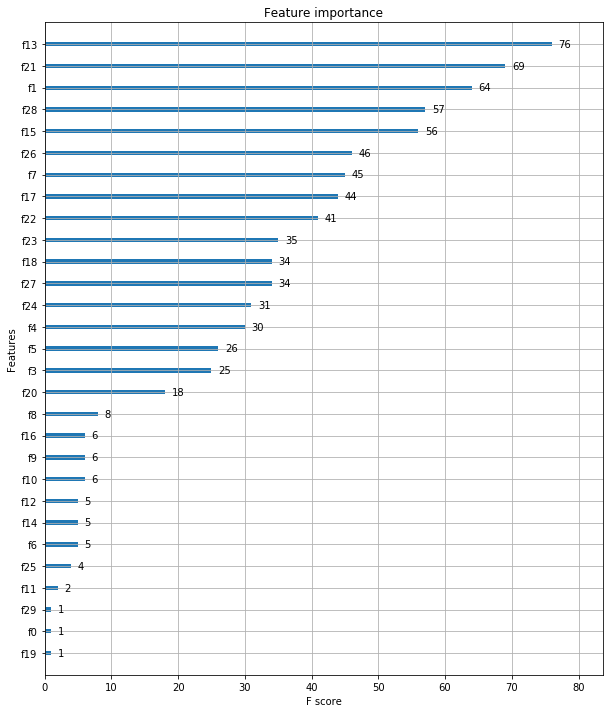

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax = ax)